In [ ]:
def A(P, i, n):

    return P/i*(1 - (1+i)**n - 1)

In [29]:
from scipy.optimize import root_scalar
from scipy.optimize import newton
f = lambda i: 1500/i *((1+i)**(20*12) - 1) - 750_000
result = root_scalar(f, method='secant', x0 = 0.01, x1 = 0.02)
year_interest  = result.root * 12
year_interest

0.06660938284899381

In [31]:
g = lambda i: 1000/i * (1-(1+i)**-(30*12)) - 135_000
result2 = root_scalar(g, method='secant', x0 = 0.01, x1 = 0.02)
year_interest = result2.root
year_interest


0.006749917160043521

In [50]:
import numpy as np
from scipy.optimize import root_scalar

# Define the equation to solve: when c(t) = 0.25 mg/mL
h = lambda t: (np.e / 3) * t * np.exp(-t/3) - 0.25

# Use secant method with two starting guesses
result3 = root_scalar(h, method='secant', x0=3, x1=4)

# Convert result to minutes
t_minutes = result3.root * 60
print(round(t_minutes))  # Round to nearest minute


665


In [51]:
from scipy.optimize import root_scalar
import numpy as np

# Define function
f = lambda t: (np.e / 3) * t * np.exp(-t/3) - 0.25

# Find the time after the peak (t > 3)
result = root_scalar(f, bracket=[3, 15], method='brentq')

t_minutes = result.root * 60

print("Second injection time (hours):", result.root)
print("Second injection time (minutes):", round(t_minutes))


Second injection time (hours): 11.077903586669134
Second injection time (minutes): 665


Root found: -1.658683161076804
f(root) ≈ 0.0


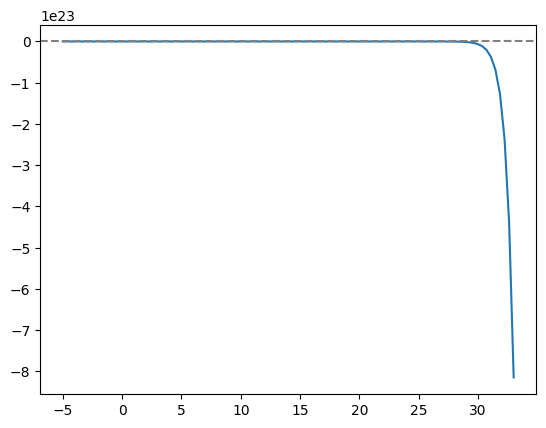

In [112]:
from scipy.optimize import newton
import numpy as np
import matplotlib.pyplot as plt
# Define the function
def f(x):
    return 3**(x + 1) - 7 * 5**x

# Define the derivative
def df(x):
    return 3**(x + 1) * np.log(3) - 7 * 5**x * np.log(5)

# Use scipy's newton method
root = newton(f, x0=0.5, fprime=df, tol=1e-16)
print(f"Root found: {root}")
print(f"f(root) ≈ {f(root)}")
x = np.linspace(-5, 33, 100)
plt.plot(x, f(x))
plt.axhline(0, c='gray', linestyle = '--')

-1.1187475303988963

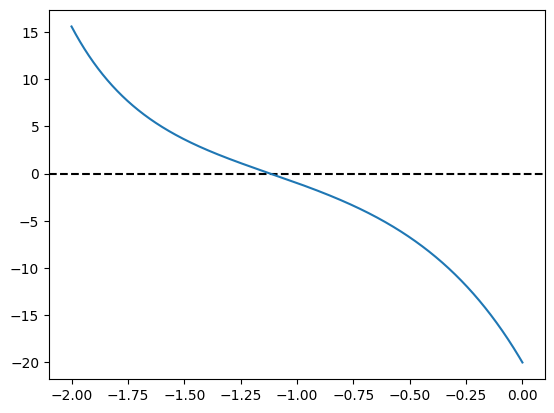

In [138]:
f = lambda x: 2**(x**2) - 3 * 7**(x + 1)
f_prime = lambda x: 2**(x**2) * np.log(2) * 2*x - 3 * 7**(x + 1) * np.log(7)
x = np.linspace(-2, 0, 10000)
plt.axhline(0, c='k', linestyle = '--')
plt.plot(x, f(x))
root2 = newton(f, x0 = -0.75,fprime= f_prime, tol =1e-16)

root2

In [135]:
root2 = newton(f, x0 = -0.75,fprime= f_prime, tol =1e-16)

RuntimeError: Failed to converge after 50 iterations, value is -1.1187458587240893.

Minimum p such that P(p) ≥ 0.5 (secant): 0.842


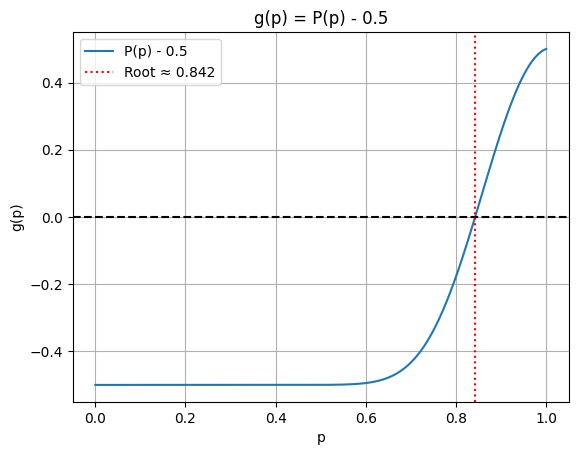

In [176]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar

# Vectorized-safe P(p)
def P(p):
    p = np.asarray(p)
    valid = (p > 0) & (p < 1)
    result = np.zeros_like(p)
    result[valid] = ((1 + p[valid]) / 2) * (p[valid] / (1 - p[valid] + p[valid]**2)) ** 21
    return result

# Vectorized-safe g(p)
def g(p):
    return P(p) - 0.5

# Root finding with secant method
res = root_scalar(g, method='secant', x0=0.85, x1=0.9, xtol=1e-3)
if res.converged:
    print(f"Minimum p such that P(p) ≥ 0.5 (secant): {res.root:.3f}")
else:
    print("Secant method did not converge.")

# Plotting
p_vals = np.linspace(0.0001, 0.9999, 1000)
plt.plot(p_vals, g(p_vals), label='P(p) - 0.5')
plt.axhline(0, color='k', linestyle='--')
plt.axvline(res.root, color='red', linestyle=':', label=f'Root ≈ {res.root:.3f}')
plt.xlabel("p")
plt.ylabel("g(p)")
plt.title("g(p) = P(p) - 0.5")
plt.legend()
plt.grid(True)
plt.show()


In [163]:
root8 = root_scalar(P, method='secant', x0 = 0.00001, x1= 0.00002 )
root8

/Users/macbook/Documents/MYSpace/FinPy/.venv/lib/python3.10/site-packages/scipy/optimize/_zeros_py.py:349: RuntimeWarning: Tolerance of 1e-05 reached.
  warnings.warn(msg, RuntimeWarning)


      converged: True
           flag: 'converged'
 function_calls: 2
     iterations: 1
           root: 1.5000000000000002e-05

In [156]:
P(0.099)

3.1652885672949754e-21

In [189]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton
import sympy as sp
# Symbolic variable
x = sp.symbols('x')

# Equations
eqs = {
    'eq1': x**2 - 2*x*sp.exp(-x) + sp.exp(-2*x),
    'eq2': sp.cos(x + sp.sqrt(2)) + x*(x/2 + sp.sqrt(2)),
    'eq3': x**3 - 3*x**2*(2**-x) + 3*x*(4**-x) - 8**-x,
    'eq4': sp.exp(6*x) + 3*sp.log(8) * sp.exp(4*x) - sp.ln(2)**3
}

# Bounds (used to set initial guesses for Newton)
bounds = {
    'eq1': 0.5,
    'eq2': -1.5,
    'eq3': 0.5,
    'eq4': -0.5
}

# Solve each equation
for name, expr in eqs.items():
    # First and second derivatives
    f_prime = sp.diff(expr, x)

    # Lambdify the function and derivative
    f_num = sp.lambdify(x, expr, 'numpy')
    df_num = sp.lambdify(x, f_prime, 'numpy')

    # Initial guess
    x0 = bounds[name]

    try:
        root = newton(f_num, x0=x0, fprime=df_num, tol=1e-10)
        print(f"{name}: root ≈ {root:.10f}, f(root) ≈ {f_num(root):.2e}")
    except Exception as e:
        print(f"{name}: Failed to converge. Reason: {str(e)}")


eq1: root ≈ 0.5671432885, f(root) ≈ 0.00e+00
eq2: root ≈ -1.4144727378, f(root) ≈ 0.00e+00
eq3: root ≈ 0.6411819168, f(root) ≈ 0.00e+00
eq4: root ≈ -0.7414963512, f(root) ≈ 5.55e-17


In [ ]:
import numpy as np
import sympy as sp

def modified_newton(f_sym, x0, tol = 1e-1)

In [191]:
now = 0.0300

fut = -0.0668 - 0.2320*now

In [194]:
fut_fut = -0.0668 * -0.2320 * fut
fut_fut

-0.0011431029759999998